In [68]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

# from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# from sklearn.utils import resample

In [69]:
# sns.set_theme(style = "whitegrid")

In [ ]:
# data = pd.read_csv("20_Rainfall_Prediction.csv")
# data.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [71]:
# data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [72]:
# data.isnull().sum()

day                       0
pressure                  0
maxtemp                   0
temparature               0
mintemp                   0
dewpoint                  0
humidity                  0
cloud                     0
rainfall                  0
sunshine                  0
         winddirection    1
windspeed                 1
dtype: int64

In [73]:
# data.columns = data.columns.str.strip()

In [74]:
# data['day'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype=int64)

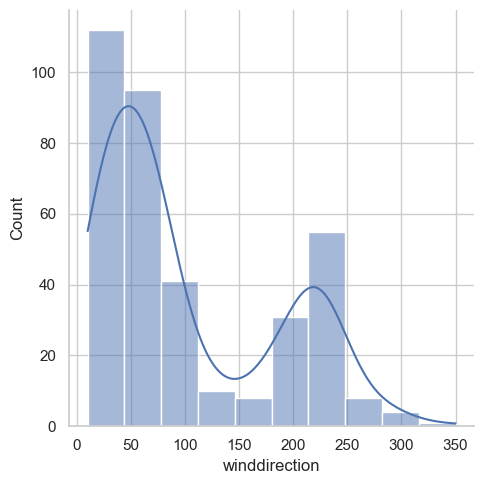

In [ ]:
# sns.displot(data['winddirection'], kde = True)
# plt.show()

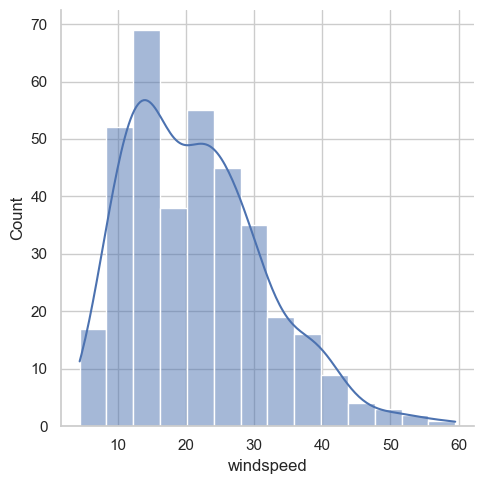

In [ ]:
# sns.displot(data['windspeed'], kde = True)
# plt.show()

In [77]:
# #Handling missing values
# data['winddirection'] = data['winddirection'].fillna(data['winddirection'].median())
# data['windspeed'] = data['windspeed'].fillna(data['windspeed'].median())

In [78]:
# data.isnull().sum()

day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    0
windspeed        0
dtype: int64

In [79]:
# data['rainfall'].value_counts()

rainfall
yes    249
no     117
Name: count, dtype: int64

In [80]:
# data['rainfall'] = data['rainfall'].map({"yes" : 1, "no" : 0})

In [ ]:
# data.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,1,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,1,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,1,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,1,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,1,0.0,40.0,13.7


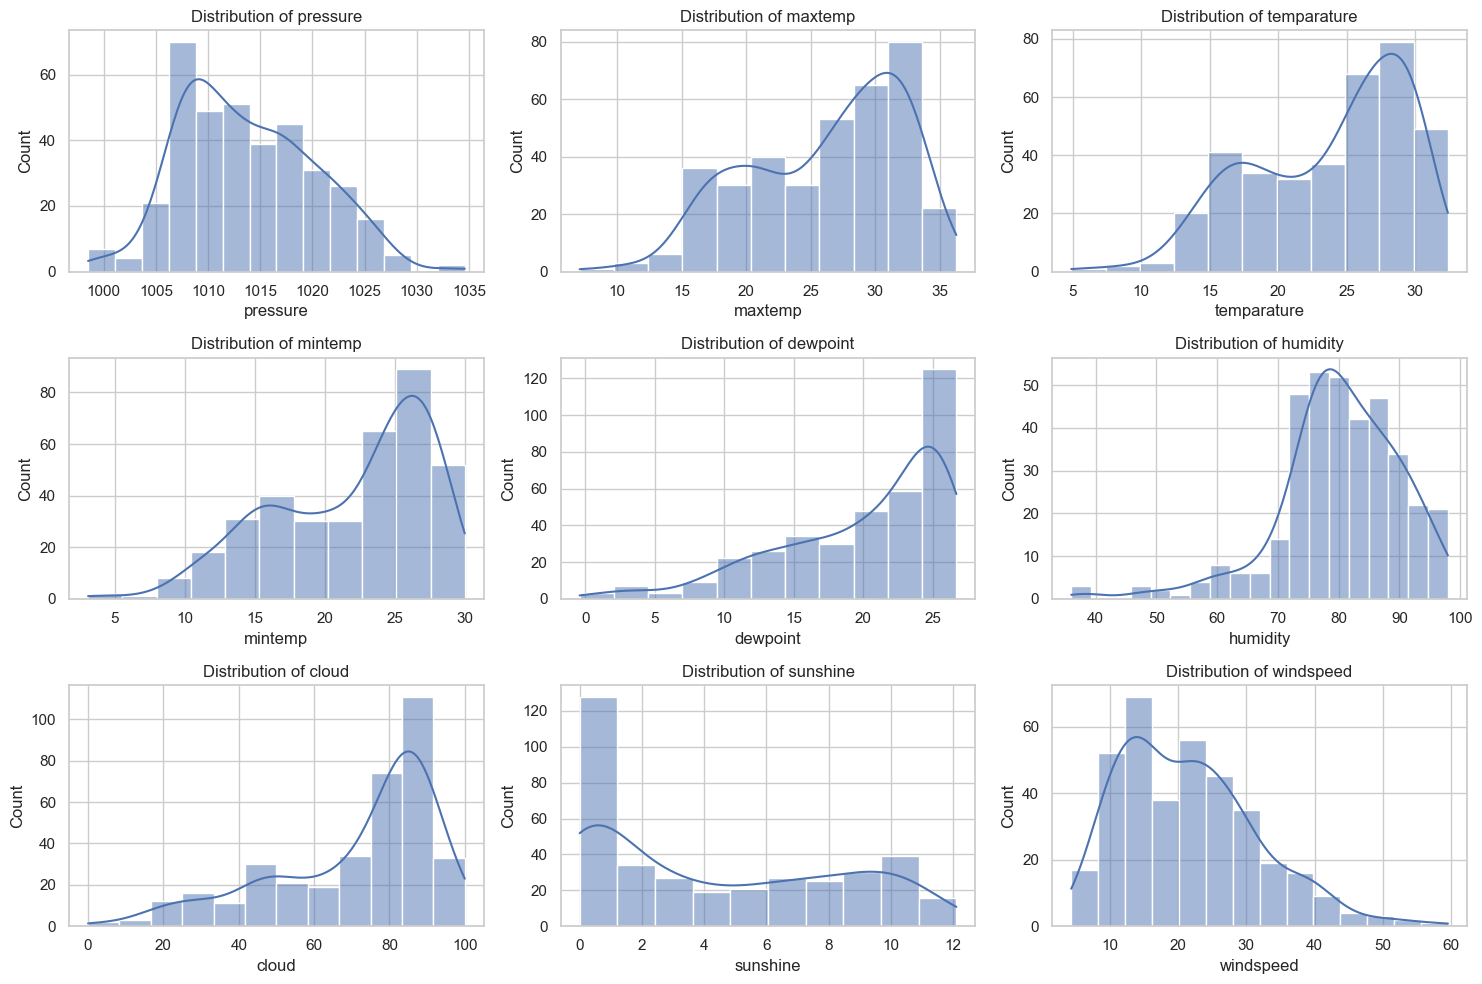

In [ ]:
# #EDA
# plt.figure(figsize = (15, 10))

# for i, col in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
#        'humidity', 'cloud', 'sunshine','windspeed'], 1): 
#     plt.subplot(3, 3, i)
#     sns.histplot(data[col], kde =True)
#     plt.title(f"Distribution of {col}")
# plt.tight_layout()
# plt.show()


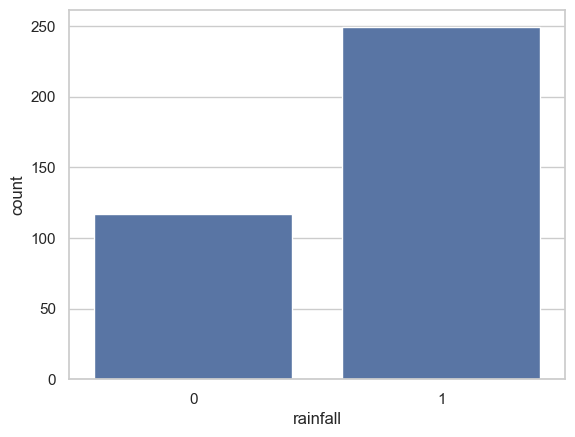

In [ ]:
# sns.countplot(x = 'rainfall', data = data)
# plt.show()

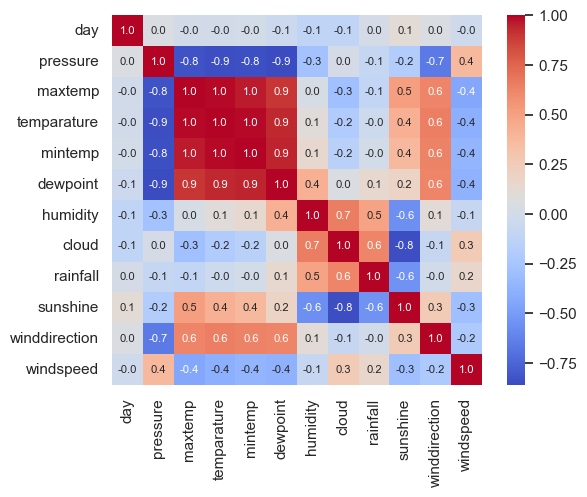

In [ ]:
# sns.heatmap(data = data.corr(), square = True, annot = True, annot_kws = {'size' : 8}, fmt = '.1f', cbar = True, cmap = 'coolwarm')
# plt.show()

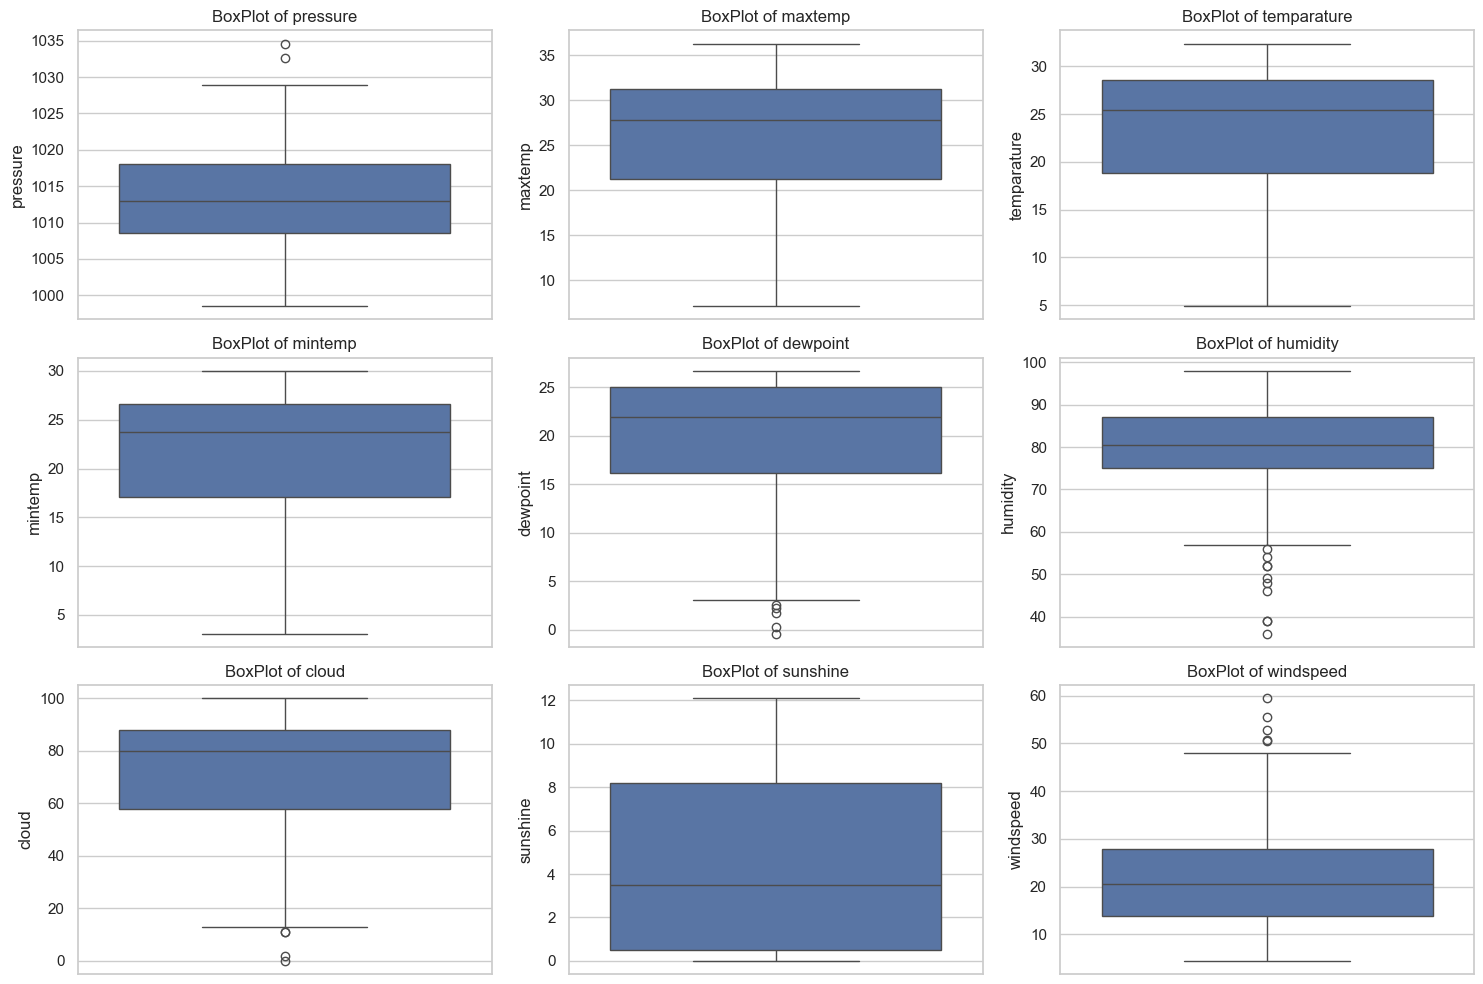

In [ ]:

# plt.figure(figsize = (15, 10))

# for i, col in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
#        'humidity', 'cloud', 'sunshine','windspeed'], 1): 
#     plt.subplot(3, 3, i)
#     sns.boxplot(data[col])
#     plt.title(f"BoxPlot of {col}")
# plt.tight_layout()
# plt.show()


In [ ]:
# #Drop highly correleated column
# data = data.drop(columns = ['day', 'maxtemp', 'temparature', 'mintemp'], axis = 1)
# data.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,18.4,95,91,1,0.0,40.0,14.2
3,1018.9,18.8,90,88,1,1.0,50.0,16.9
4,1015.9,19.9,95,81,1,0.0,40.0,13.7


In [87]:
# #Separate Majority and Minority class
# data['rainfall'].value_counts()

rainfall
1    249
0    117
Name: count, dtype: int64

In [88]:
# majorDF = data[data['rainfall'] == 1]
# minorDF = data[data['rainfall'] == 0]

# print(majorDF.shape, minorDF.shape)

(249, 8) (117, 8)


In [89]:
# #Downsample major class
# majorDF_downSample  = resample(majorDF, replace = False, n_samples = len(minorDF), random_state = 5)
# print(majorDF_downSample.shape, minorDF.shape)

(117, 8) (117, 8)


In [90]:
# newData = pd.concat([majorDF_downSample, minorDF])
# newData.shape

(234, 8)

In [91]:
# #Shuffle
# newData = newData.sample(frac = 1, random_state = 5).reset_index(drop = True)
# newData.head()


,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1012.0,23.0,74,44,1,10.1,70.0,26.2
1,1012.5,19.3,70,43,0,9.7,60.0,8.9
2,1007.6,24.8,85,84,1,1.8,70.0,34.8
3,1006.2,24.8,84,87,1,3.1,230.0,11.0
4,1014.3,16.0,97,97,1,0.0,50.0,26.5


In [92]:
# X = newData.drop(columns = 'rainfall', axis = 1).values
# Y = newData['rainfall'].values

In [93]:
# xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [94]:
# #Hyperparamter Tunning
# model = RandomForestClassifier(random_state = 42)

In [95]:
# param = {
#     "n_estimators" : [50, 100, 200],
#     'max_features' : ['sqrt', 'log2'],
#     'criterion' : ['gini', 'entropy', 'log_loss'],
#     'max_depth' : [None, 10, 30, 50],
#     'min_samples_split' : [2, 5, 10],
#     'min_samples_leaf' : [1, 2, 4]
# }

In [96]:
# gsCV = GridSearchCV(model, param, cv = 5)

In [ ]:
# gsCV.fit(xTrain, yTrain)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 10, 30, 50],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [98]:
# result = {
#     'model' : model,
#     'best_score' : gsCV.best_score_,
#     'best_param' : gsCV.best_params_,
#     'best_estimator' : gsCV.best_estimator_
# }
# result

{'model': RandomForestClassifier(random_state=42),
 'best_score': 0.7648648648648648,
 'best_param': {'criterion': 'gini',
  'max_depth': None,
  'max_features': 'sqrt',
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 50},
 'best_estimator': RandomForestClassifier(n_estimators=50, random_state=42)}

In [99]:
# best_model = gsCV.best_estimator_

In [ ]:
# cvScore = cross_val_score(best_model, xTrain, yTrain, cv = 5)
# print("CV Score: ", cvScore)
# print("Mean Value: ", np.mean(cvScore))

CV Score:  [0.73684211 0.76315789 0.83783784 0.7027027  0.78378378]
Mean Value:  0.7648648648648648


In [ ]:
# cvScore = cross_val_score(best_model, xTest, yTest, cv = 5)
# print("CV Score: ", cvScore)
# print("Mean Value: ", np.mean(cvScore))

CV Score:  [0.6        0.8        0.66666667 1.         0.66666667]
Mean Value:  0.7466666666666666


In [ ]:
# #For default Model

# cvScore = cross_val_score(model, xTrain, yTrain, cv = 5)
# print("CV Score: ", cvScore)
# print("Mean Value: ", np.mean(cvScore))

CV Score:  [0.76315789 0.73684211 0.83783784 0.67567568 0.75675676]
Mean Value:  0.754054054054054


In [ ]:
# cvScore = cross_val_score(model, xTest, yTest, cv = 5)
# print("CV Score: ", cvScore)
# print("Mean Value: ", np.mean(cvScore))

CV Score:  [0.6        0.8        0.66666667 1.         0.66666667]
Mean Value:  0.7466666666666666


In [104]:
# #Testing Evaluation

# prediction = best_model.predict(xTest)

# print("Accuracy: ", accuracy_score(yTest, prediction))
# print("\nConfusion Matrix:\n", confusion_matrix(yTest, prediction))
# print("\nClassification Report:\n", classification_report(yTest, prediction))

Accuracy:  0.6382978723404256

Confusion Matrix:
 [[14  8]
 [ 9 16]]

Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.64      0.62        22
           1       0.67      0.64      0.65        25

    accuracy                           0.64        47
   macro avg       0.64      0.64      0.64        47
weighted avg       0.64      0.64      0.64        47



TO DO:
1. SMOTE for sampling
2. PCA for dropping
3. Model Selection